In [26]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Flatten , Conv2D , MaxPooling2D , Dropout , BatchNormalization
import matplotlib.pyplot as plt


In [2]:
(X_train , y_train),(X_test , y_test) = cifar10.load_data()

In [3]:
X_train , X_test  = X_train/255 , X_test/255

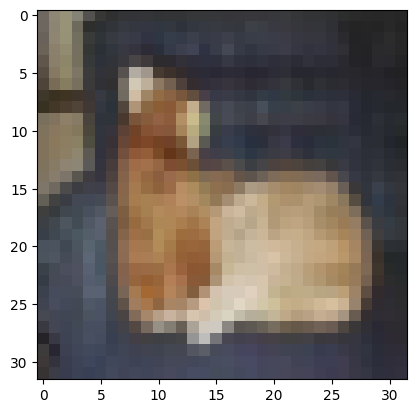

In [17]:
plt.imshow(X_train[17])

In [28]:
X_train.shape

(50000, 32, 32, 3)

In [32]:
import numpy as np

unique = np.unique(y_train)
len(unique)


10

In [18]:
y_train[17][0]

3

In [7]:
class_names = ["airplane" , "automobile" , "bird" , "cat" , "deer" ,"dog" , "frog" , "horse" , "ship" , "truck"]

In [19]:
class_names[3]

'cat'

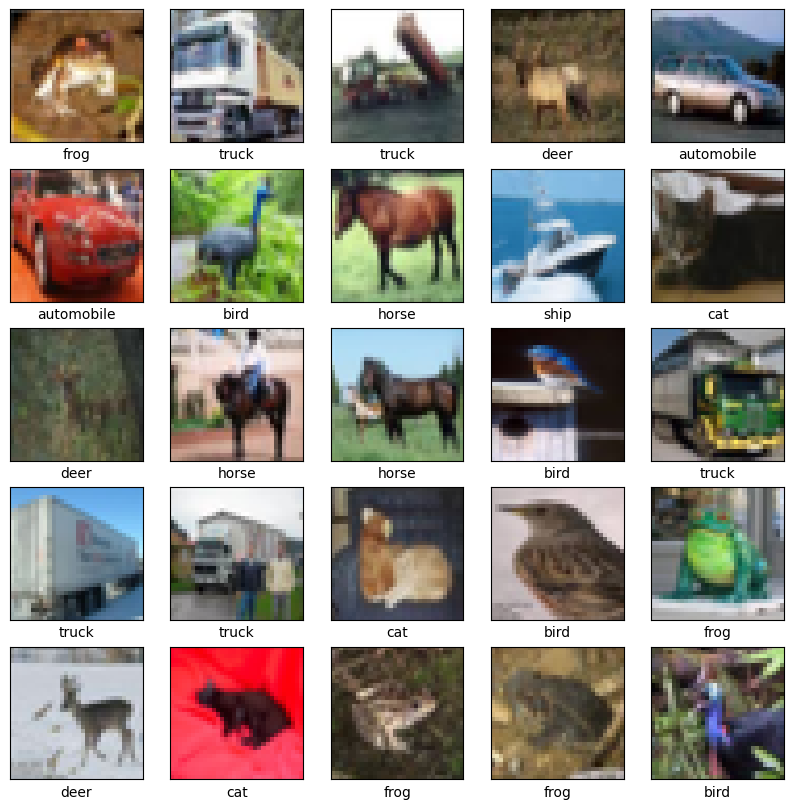

In [23]:
plt.figure(figsize = (10 ,10))
for i in range(25):
    plt.subplot(5 , 5 , i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])

    plt.xlabel(class_names[y_train[i][0]])
plt.show()


In [35]:
model = Sequential()


model.add(Conv2D(32 , kernel_size = (3 , 3) , activation = "relu" , padding = "valid" , input_shape = (32 , 32 ,3)))
model.add(MaxPooling2D(pool_size = (2 , 2) , strides = 2 , padding = "valid"))
model.add(BatchNormalization())

model.add(Conv2D(64 , kernel_size = (3 ,3 ) , activation = "relu" , padding= "valid"))
model.add(MaxPooling2D(pool_size = (2 ,2) , padding = "valid" , strides = 2))
model.add(BatchNormalization())

model.add(Conv2D(128 , kernel_size = (3 ,3 ) , padding = "valid" , activation = "relu"))
model.add(MaxPooling2D(pool_size = (2 , 2) , strides = 2 , padding = "valid"))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(128 , activation = "relu"))
model.add(Dropout(0.15))
model.add(Dense(64 , activation = "relu"))
model.add(Dropout(0.15))

model.add(Dense(10  , activation = "softmax"))


model.summary()


C:\Users\umark\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 15, 15, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 6, 6, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 2, 2, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 168,714 (659.04 KB)

 Trainable params: 168,266 (657.29 KB)

 Non-trainable params: 448 (1.75 KB)

In [40]:
model.compile(optimizer="adam" , loss = "sparse_categorical_crossentropy" , metrics = ["accuracy"])


In [41]:
history = model.fit(X_train , y_train , epochs = 10 , validation_data = (X_test , y_test) , batch_size = 64)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 33ms/step - accuracy: 0.4010 - loss: 1.6681 - val_accuracy: 0.5373 - val_loss: 1.3526
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.6192 - loss: 1.0842 - val_accuracy: 0.6397 - val_loss: 1.0250
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.6855 - loss: 0.9096 - val_accuracy: 0.6542 - val_loss: 0.9792
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 49ms/step - accuracy: 0.7264 - loss: 0.7818 - val_accuracy: 0.6925 - val_loss: 0.9063
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 85s 108ms/step - accuracy: 0.7605 - loss: 0.6839 - val_accuracy: 0.6469 - val_loss: 1.0629
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.7915 - loss: 0.6109 - val_accuracy: 0.6649 - val_loss: 1.0158
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.8107 - loss: 0.5475 - val_accuracy: 0.7073 - val_loss: 0.8892
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.8315 - loss: 0.4936 -

In [44]:
test_loss , test_accc = model.evaluate(X_test , y_test , verbose = 1)
print(test_accc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7401 - loss: 0.8432
0.737500011920929


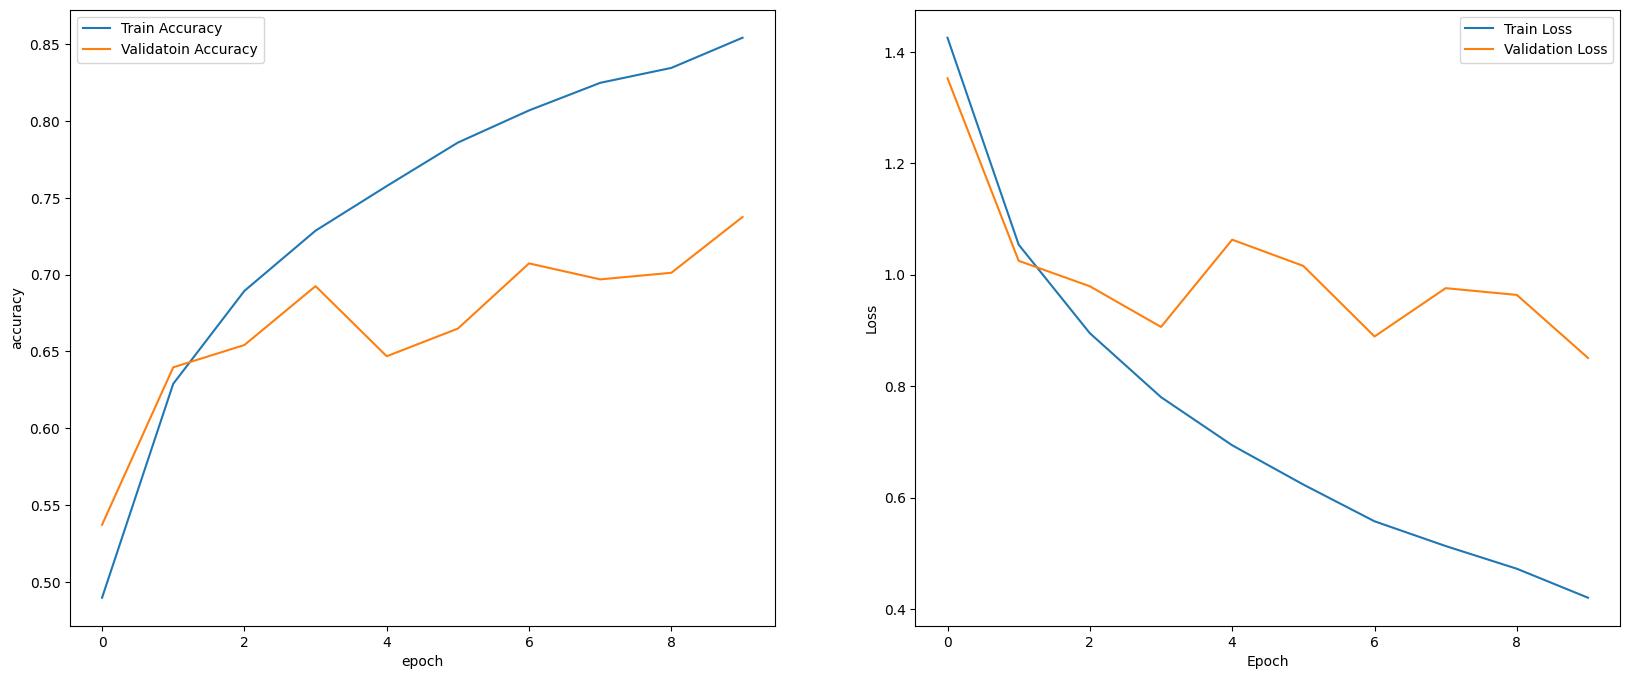

In [48]:
plt.figure(figsize = (20 , 8))

plt.subplot(1 , 2 , 1)
plt.plot(history.history["accuracy"] , label = "Train Accuracy")
plt.plot(history.history["val_accuracy"] , label = "Validatoin Accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()


plt.subplot(1 , 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [53]:
img = np.expand_dims(X_test[0] , axis = 0)
img.shape

(1, 32, 32, 3)

In [55]:
np.argmax(model.predict(img))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


8

Text(0.5, 0, 'cat')

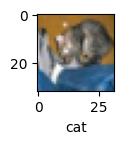

In [61]:
plt.figure(figsize=(1,1))
plt.imshow(X_test[0])
plt.xlabel(class_names[y_test[0][0]])


In [57]:
y_test[8][0]

3

In [62]:
class_names[3]

'cat'

In [63]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [64]:

datagen = ImageDataGenerator(
    rotation_range=20,      
    width_shift_range=0.2,  
    height_shift_range=0.2, 
    shear_range=0.2,        
    zoom_range=0.2,         
    horizontal_flip=True,   
    fill_mode='nearest'     
)


In [65]:
datagen.fit(X_train)

In [66]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    epochs=10,
    validation_data=(X_test, y_test)
)

Epoch 1/10


C:\Users\umark\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 53s 68ms/step - accuracy: 0.5795 - loss: 1.2522 - val_accuracy: 0.6320 - val_loss: 1.1066
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 54s 68ms/step - accuracy: 0.6122 - loss: 1.1149 - val_accuracy: 0.6858 - val_loss: 0.9341
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.6338 - loss: 1.0598 - val_accuracy: 0.7022 - val_loss: 0.8908
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.6440 - loss: 1.0310 - val_accuracy: 0.7098 - val_loss: 0.8568
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.6506 - loss: 1.0172 - val_accuracy: 0.6546 - val_loss: 1.0494
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.6629 - loss: 0.9910 - val_accuracy: 0.7100 - val_loss: 0.8479
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.6628 - loss: 0.9781 - val_accuracy: 0.6397 - val_loss: 1.0869
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.6735 - loss: 0.9480 - val_accurac

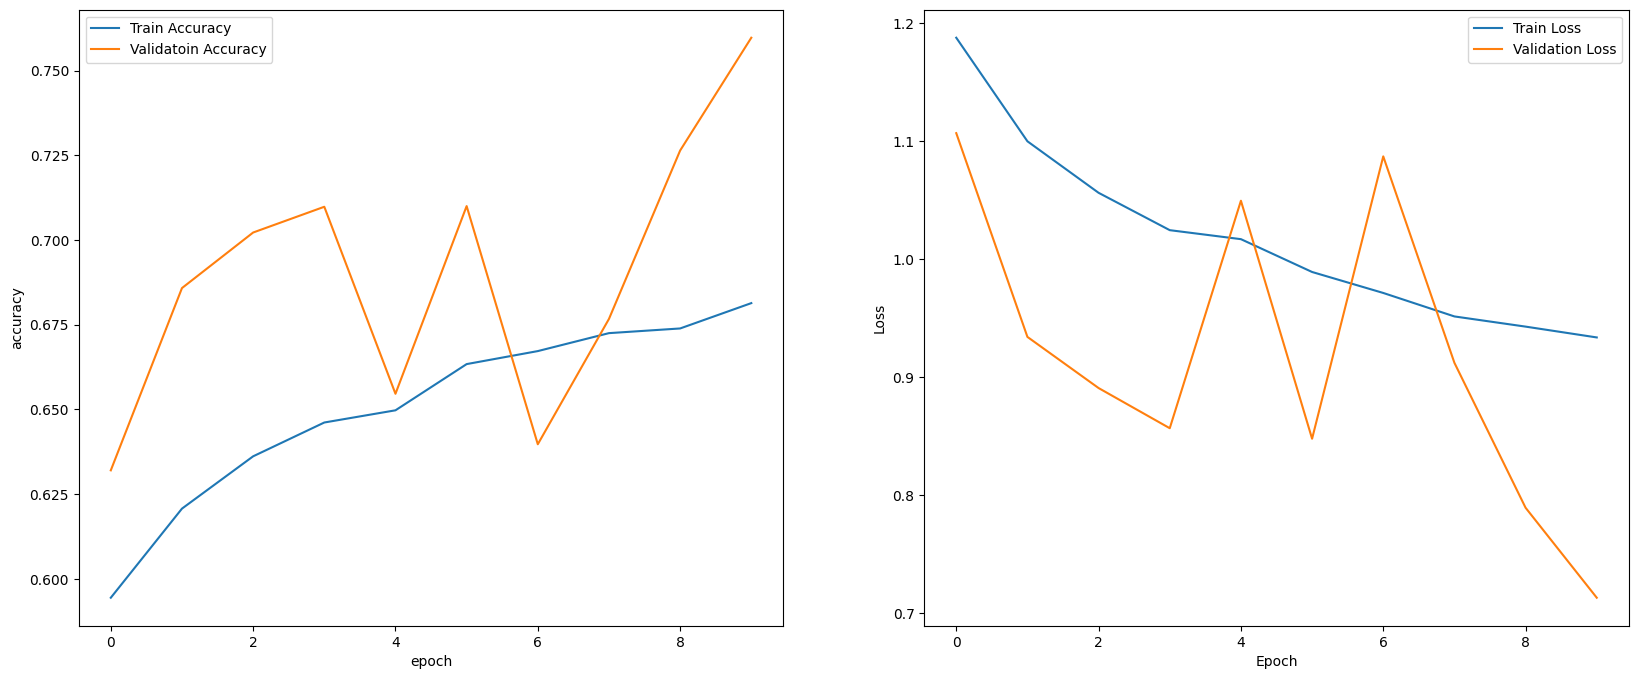

In [67]:
plt.figure(figsize = (20 , 8))

plt.subplot(1 , 2 , 1)
plt.plot(history.history["accuracy"] , label = "Train Accuracy")
plt.plot(history.history["val_accuracy"] , label = "Validatoin Accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()


plt.subplot(1 , 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()